In [114]:
%matplotlib notebook
import json
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
sns.set(font_scale=.8)
sns.set_style({
    'axes.facecolor': 'white',
 'axes.edgecolor': '0',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.9',
 'grid.linestyle': 'dashed',
 'text.color': '.1',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': [
     'Muli', 
     'Arial',
     'DejaVu Sans',
     'Liberation Sans',
     'Bitstream Vera Sans',
     'sans-serif'
 ],
 'patch.force_edgecolor': True,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True})

In [115]:
# Date time

def toUnixEpoch(y, m, d):
    return int(datetime(y, m, d, 0, 0).timestamp())

In [127]:
import requests

DIFFICULTY = 'https://api.blockchain.info/charts/difficulty?timespan=all&format=json'
HASH_RATE = 'https://api.blockchain.info/charts/hash-rate?timespan=all&format=json'

#r = requests.get(DIFFICULTY)
#difficulty_values = r.json()

r = requests.get(HASH_RATE)
hashrate_values = r.json()

In [140]:
# Load data

json_file = open('hash-power.json')
data = json.load(json_file)
H_t = hashrate_values['values']

<IPython.core.display.Javascript object>


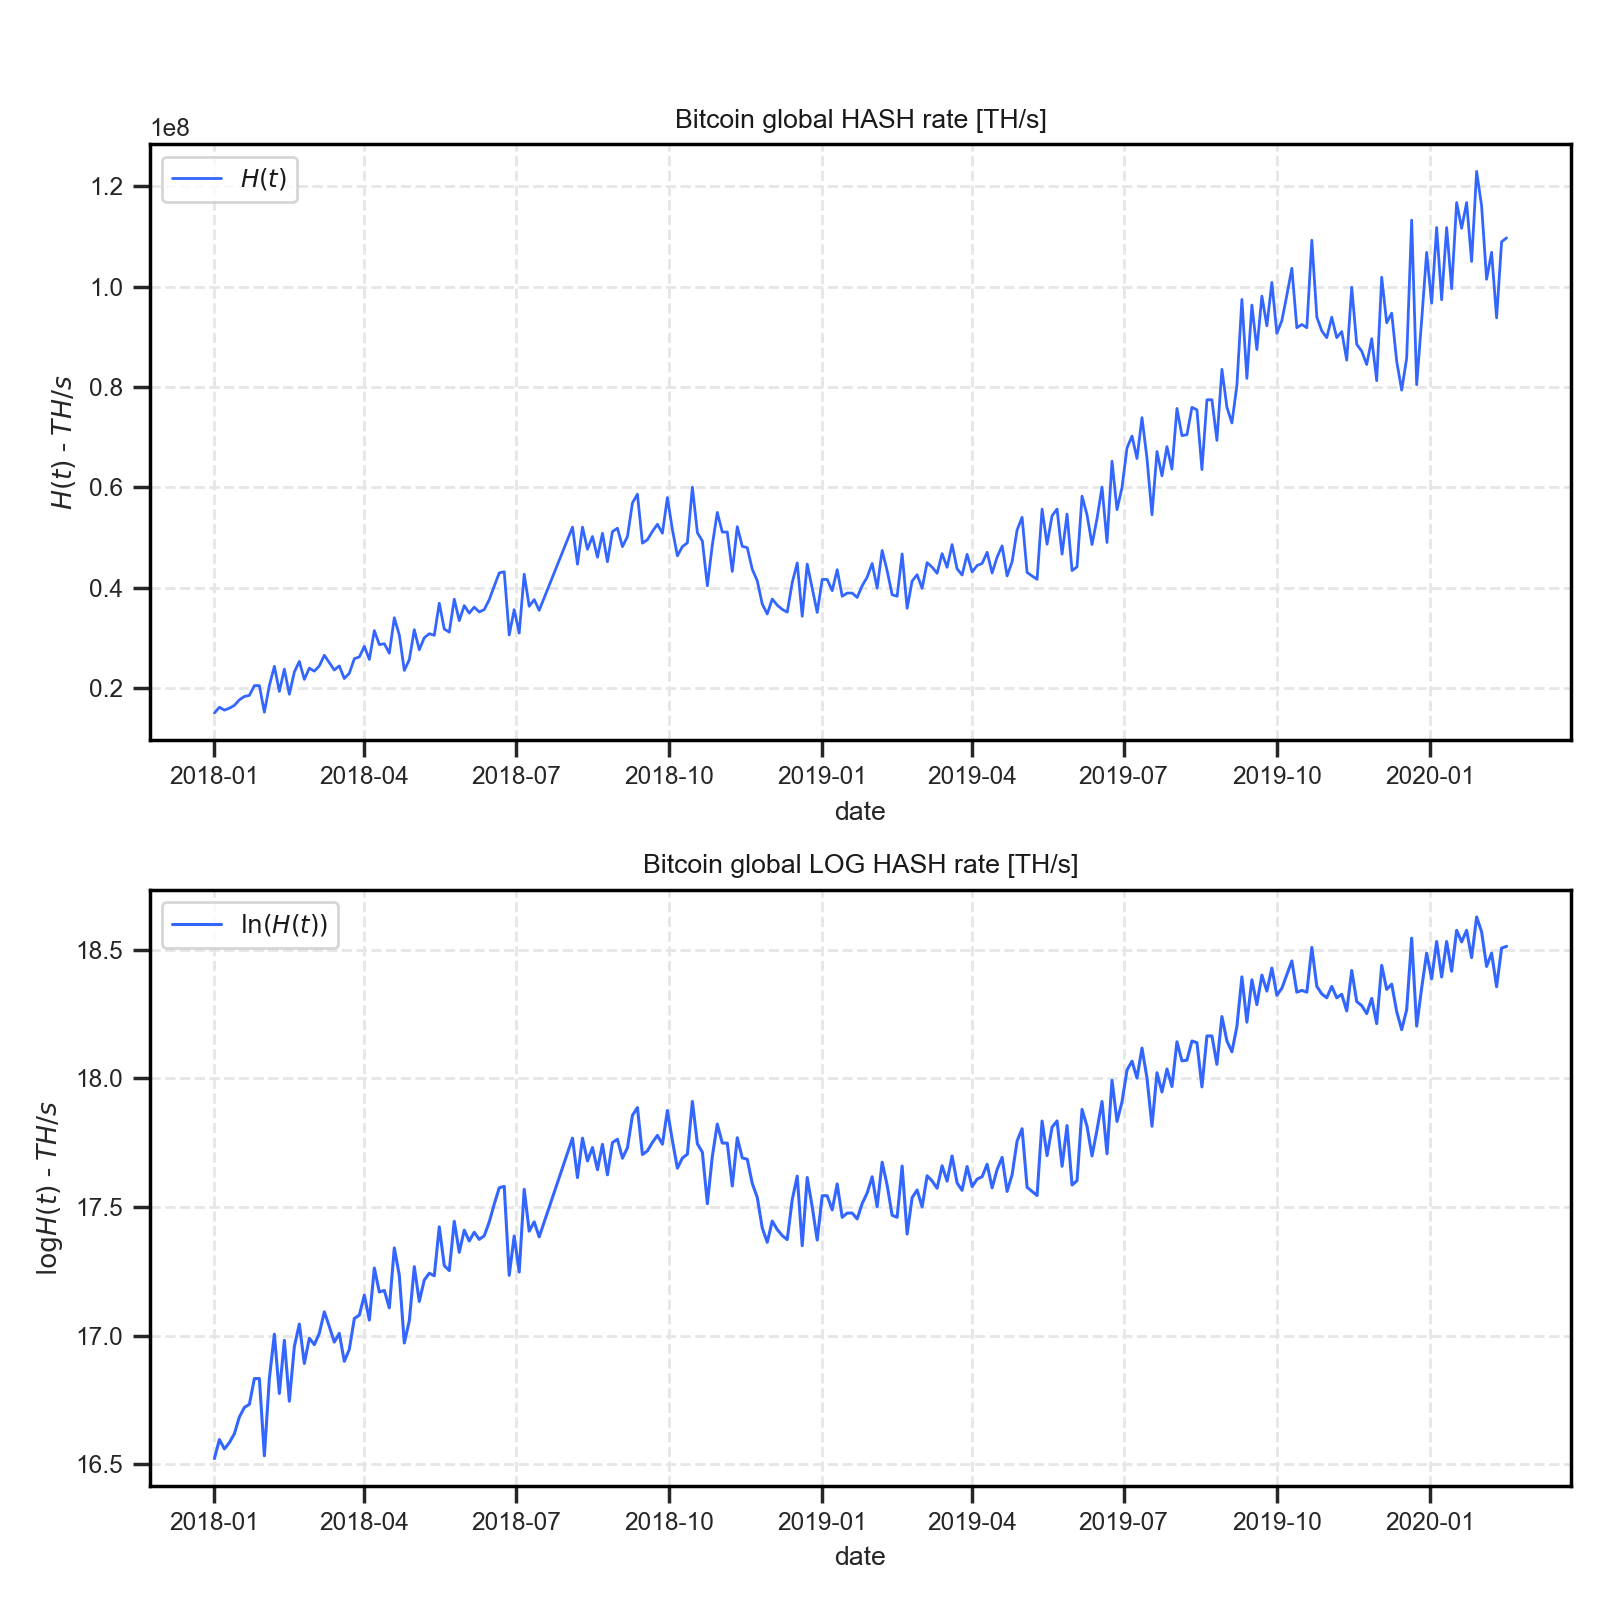

In [142]:
# Visualization

H_d = [(d['x'], d['y']) for d in H_t if int(d['x']) > toUnixEpoch(2018, 1, 1)]
Ts = [datetime.fromtimestamp(int(x[0])) for x in H_d]

H = [float(x[1]) for x in H_d]

#plt.rcParams.update({'font.size': 22})

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(top=.90)

ax1 = fig.add_subplot(211)
#ax1.set_facecolor('#EBEBEB')
ax1.set_title('Bitcoin global HASH rate [TH/s]')
ax1.set_ylabel('$H(t)$ - $TH/s$')
ax1.set_xlabel('date')
ax1.plot(Ts, H, label='$H(t)$', c='#3366FF', linewidth=1)
ax1.legend()

ax2 = fig.add_subplot(212)
#ax2.set_facecolor('#EBEBEB')
ax2.set_title('Bitcoin global LOG HASH rate [TH/s]')
ax2.set_ylabel('$\log H(t)$ - $TH/s$')
ax2.set_xlabel('date')
ax2.plot(Ts, np.log(H), label='$\ln(H(t))$', c='#3366FF', linewidth=1.1)
ax2.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [195]:
T = [float(x[0]) for x in H_d]
H = [float(x[1]) for x in H_d]

x = np.array(T)
y = np.array(np.log(H))
X = np.vstack([x, np.ones(len(x))]).T

#reg = LinearRegression().fit(X, y)

print('score: {0:.3f}'.format(reg.score(X, y)))
print(reg.coef_)
print(reg.intercept_)

score: 0.846
[2.30816494e-08 0.00000000e+00]
-18.04550761099243


<IPython.core.display.Javascript object>


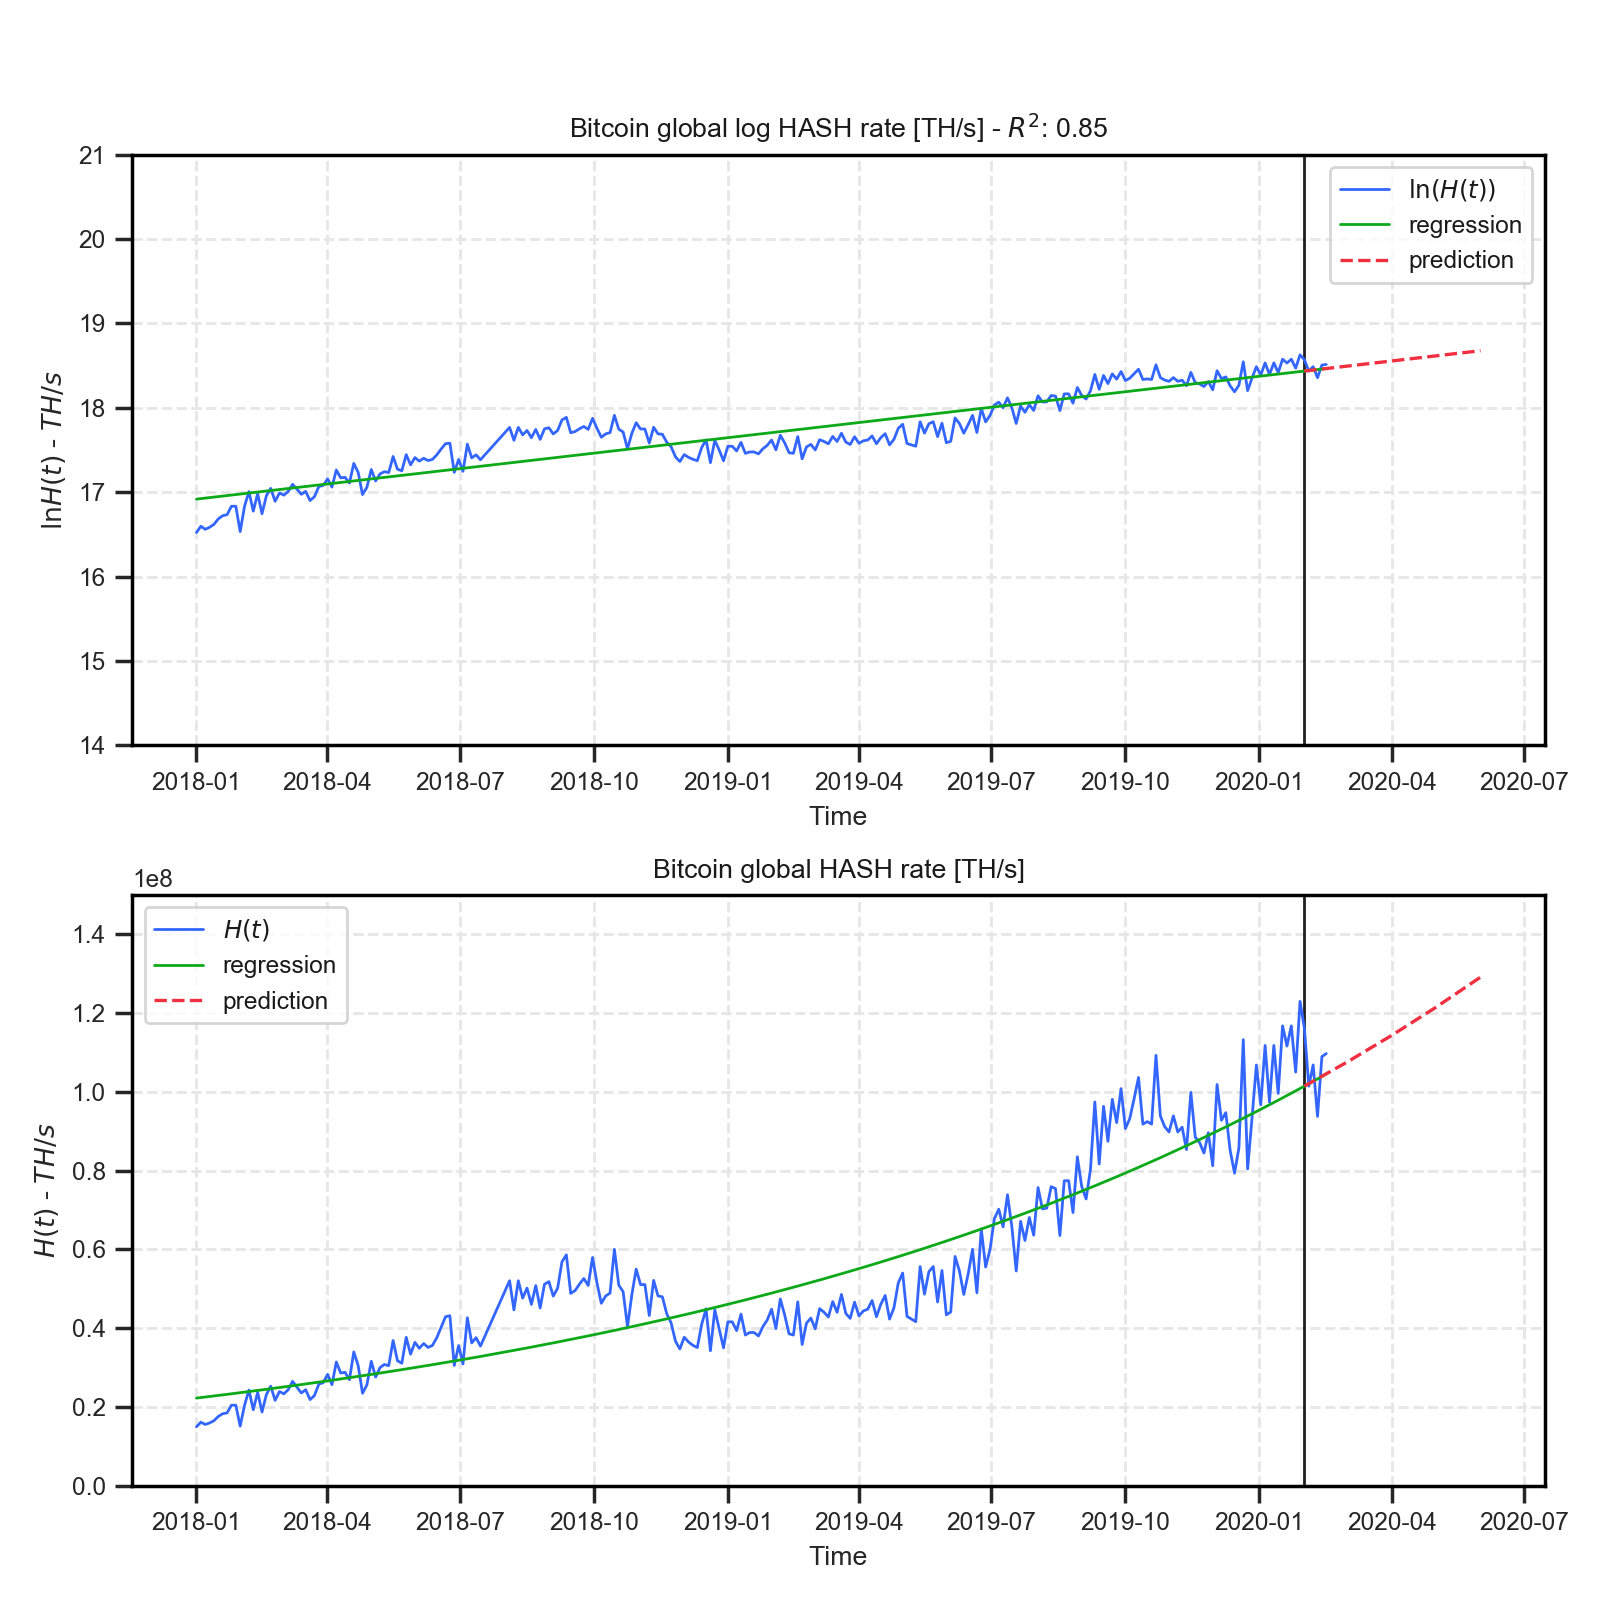

0.036799528002537135 0.8463888439942352


In [215]:
import colors
from sklearn.metrics import mean_squared_error, r2_score

f = [
    toUnixEpoch(2020, 2, 1), 
    toUnixEpoch(2020, 3, 1), 
    toUnixEpoch(2020, 4, 1),
    toUnixEpoch(2020, 5, 1),
    toUnixEpoch(2020, 6, 1),
]
p = np.array(f)
P = np.vstack([p, np.ones(len(p))]).T
PTs = [datetime.fromtimestamp(x) for x in f]

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(top=.90)

predictions = reg.predict(X)
mse = mean_squared_error(np.log(H), predictions)
r2 = r2_score(np.log(H), predictions)
print(mse, r2)
ax1 = fig.add_subplot(211)
#ax1.set_facecolor('#FAFAFA')
ax1.set_title('Bitcoin global log HASH rate [TH/s] - $R^{2}$:' + ' {:.2f}'.format(r2))
ax1.set_ylabel('$\ln{H(t)}$ - $TH/s$')
ax1.set_xlabel('Time')
ax1.set_ylim(ymin=14.0, ymax=21.0)
ax1.plot(Ts, np.log(H), label='$\ln(H(t))$', c=colors.UI_BLUE_60, linewidth=1)
ax1.plot(Ts, (reg.predict(X)) , label='regression', c=colors.STATUS_GREEN, linewidth=1)
ax1.plot(PTs, (reg.predict(P)) , label='prediction', c=colors.STATUS_RED, linewidth=1.2, ls='--')
ax1.vlines(datetime.fromtimestamp(toUnixEpoch(2020, 2, 1)), 14, 21, linewidth=1, color=colors.GREY_90)
ax1.legend()

ax2 = fig.add_subplot(212)
#ax2.set_facecolor('#FAFAFA')
ax2.set_title('Bitcoin global HASH rate [TH/s]')
ax2.set_ylabel('$H(t)$ - $TH/s$')
ax2.set_xlabel('Time')
ax2.plot(Ts, H, label='$H(t)$', c='#3366FF', linewidth=1)
ax2.plot(Ts, np.exp(reg.predict(X)) , label='regression', c=colors.STATUS_GREEN, linewidth=1)
ax2.plot(PTs, np.exp(reg.predict(P)) , label='prediction', c=colors.STATUS_RED, linewidth=1.2, ls='--')
ax2.vlines(datetime.fromtimestamp(toUnixEpoch(2020, 2, 1)), 0, 1.5e8, linewidth=1, color=colors.GREY_90)
ax2.set_ylim(ymin=0, ymax=1.5e8)
ax2.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<IPython.core.display.Javascript object>


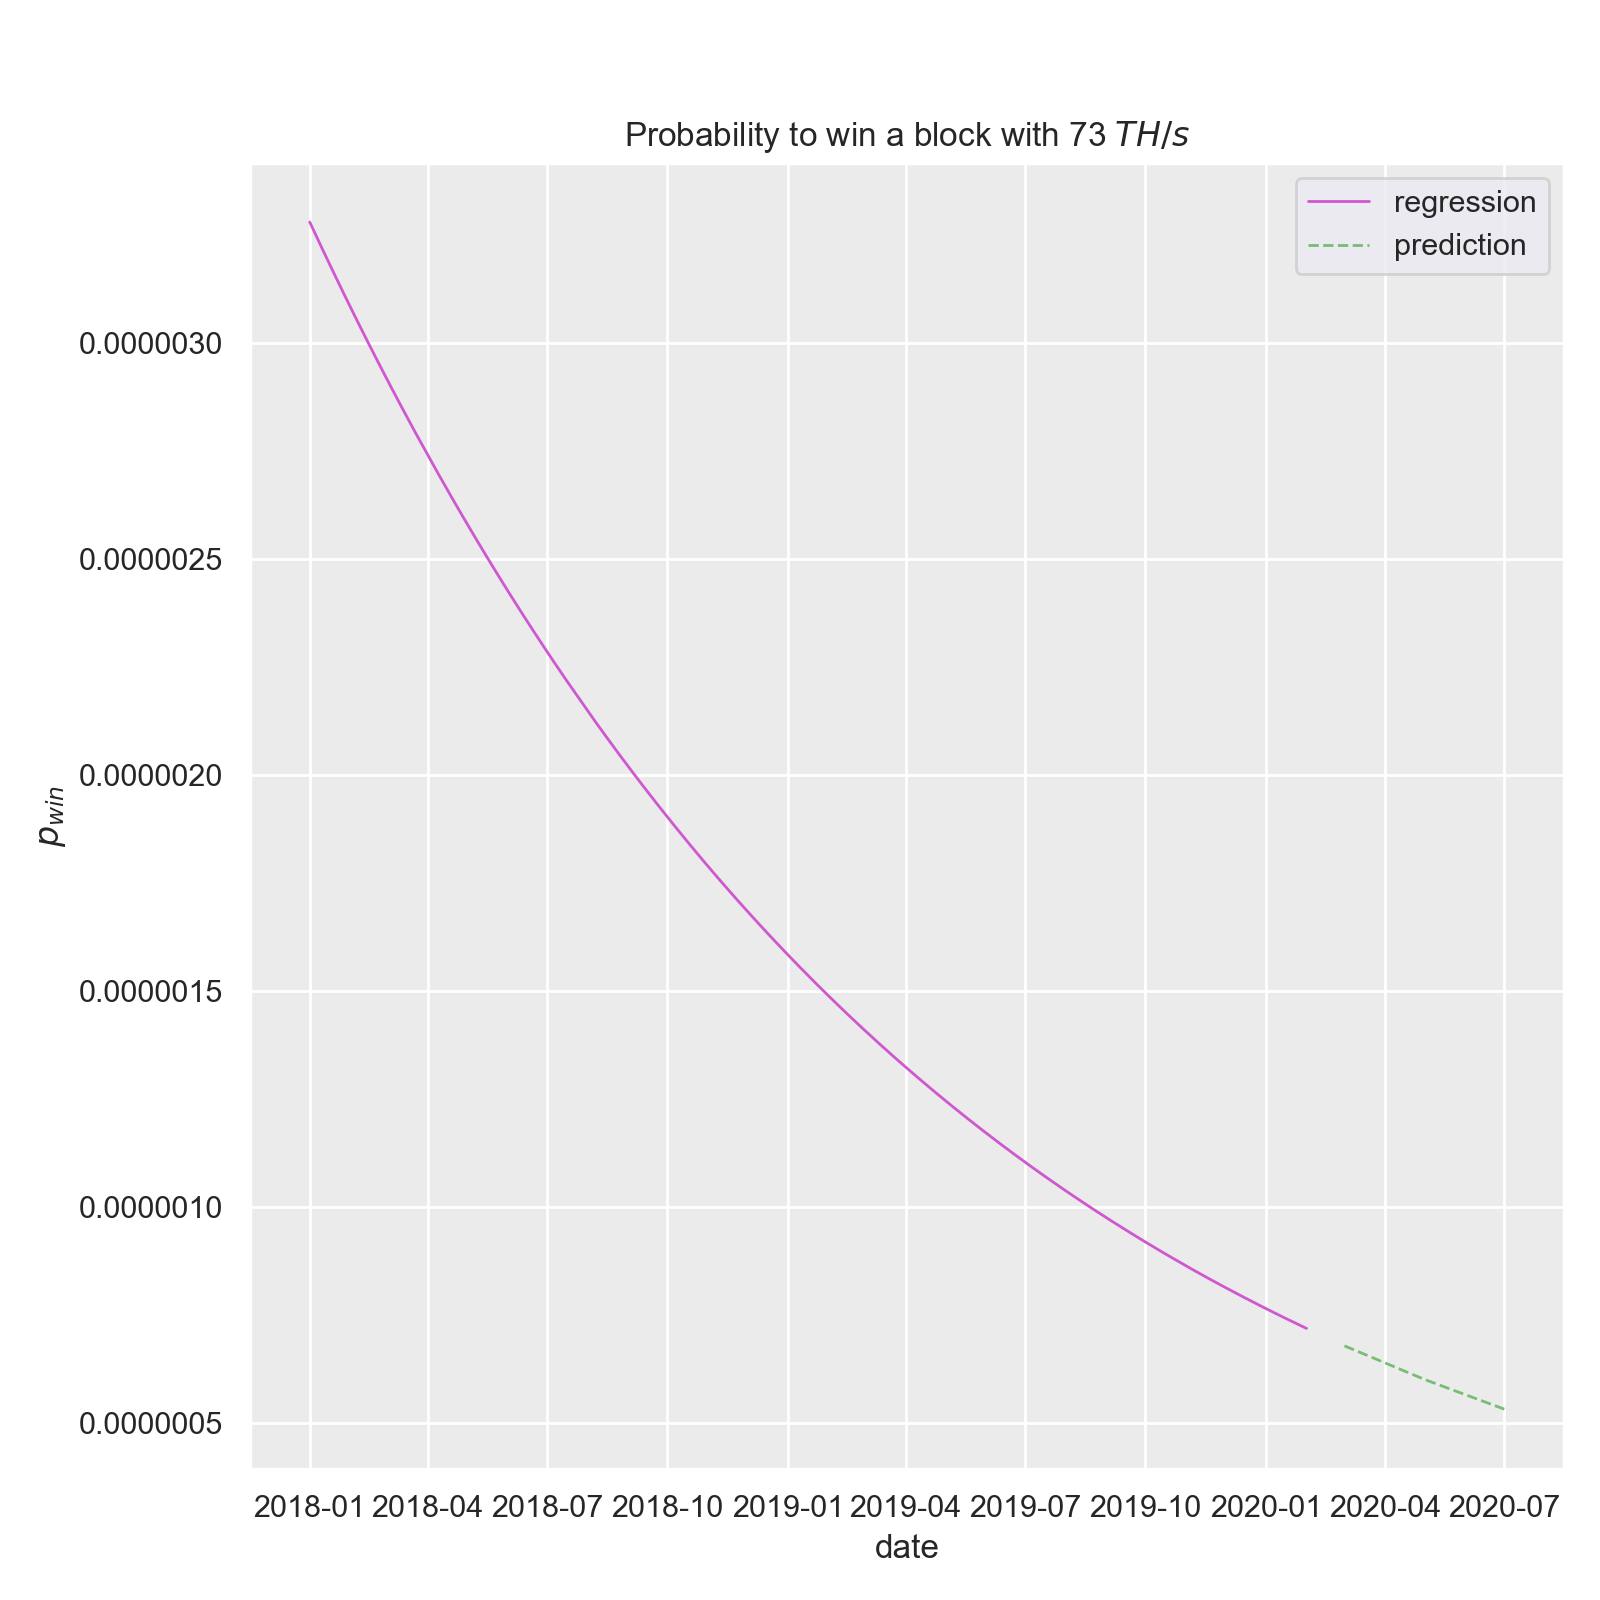

In [8]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(top=.90)

ax2 = fig.add_subplot(111)
ax2.set_facecolor('#EBEBEB')
ax2.set_title('Probability to win a block with 73 $TH/s$')
ax2.set_ylabel('$p_{win}$')
ax2.set_xlabel('date')
ax2.plot(Ts, 73 * np.power(np.exp(reg.predict(X)), -1) , label='regression', c='#CF57CF', linewidth=1)
ax2.plot(PTs, 73 * np.power(np.exp(reg.predict(P)), -1) , label='prediction', c='#78BD73', linewidth=1, ls='--')
ax2.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [182]:
ax = sns.regplot(x=T, y=H, color="g")
plt.show()

In [9]:
m1 = reg.coef_[0]
q1 = reg.intercept_
print(m1, q1)

2.3081649361561667e-08 -18.04550761099243


In [10]:
import time;
ts = time.time()
print(int(ts))

1582152307


In [11]:
def tt(r):
    return 1580652314 + r*600

In [12]:
A = np.exp(q1)
def H(r):
    return A*np.exp(m1*tt(r))

In [13]:
class BTCExp:
    def __init__(self, TH, N, C, e, S, BTCUSD, m, q):
        self.TH = TH
        self.N = N
        self.P = N * TH / 73. * 2920 # watt
        self.BTCUSD = BTCUSD
        self.e = e
        self.S = S
        self.C = C
        self.c = self.C * TH / 73
        self.m = m
        self.q = q
    
    def computeExpectation(self, days):
        
        def tt(r):
            return 1580652314 + r*600
        
        A = math.exp(self.q)
        def H(r):
            return A*math.exp(self.m*tt(r))
        
        E = 0
        r = 0
        rt = days * 6 * 24
        while(r < rt):
            r += 1
            E += (self.N * self.TH) / (H(r) - (self.N * self.TH))
        
        self.r = r
        self.E = E
        self.results()
    
    def expectedBTC(self):
        return self.E * self.S
    
    def expectedValue(self):
        return self.expectedBTC() * self.BTCUSD
        
    def energy(self):
        return self.P / 1000. / 6. * self.r
    
    def totalCost(self):
        return self.energy() * self.e + self.c
    
    def results(self):
        print ('\n\n')
        print ('————————————————————————————————————————————————————————————')
        print ('Rounds           :', self.r, '(', self.r / 6 / 24, ') days')
        print ('————————————————————————————————————————————————————————————')
        print ('Device hash rate :', self.TH * self.N, 'TH/s' )
        print ('Expeted wins     :', self.E)
        print ('Subside  and fees:', self.S, 'BTC')
        
        print ('Expected BTCs    :', self.expectedBTC())
        print ('BTC/USD          :', self.BTCUSD, 'USD')
        print ('Expected Value   : %.5f %s' % (self.expectedValue(), 'USD'))
        print ('Energy consum.   :', self.energy(), 'kWh (28.95 W/TH/s)')
        print ('Energy price.    :', self.e, 'USD/kWh')
        print ('Energy cost      :', self.energy() * self.e, 'USD')
        print ('Device cost      :', self.c, 'USD')
        print ('                  ', '----------')
        print ('Total costs      :', self.totalCost())
        print ('Expected Profit  :', self.expectedValue() - self.totalCost())
        print ('         per kWh :', (self.expectedValue() - self.totalCost()) / self.energy() )
    

In [14]:
N = 1 # number of devices
h = 73*N # hash rate

In [15]:
m12 = BTCExp(h, N, 1000, 0.05, 12.5 + 0.05, 9450, m1, q1)
m12.computeExpectation(365)
m12.computeExpectation(365*2)




————————————————————————————————————————————————————————————
Rounds           : 52560 ( 365.0 ) days
————————————————————————————————————————————————————————————
Device hash rate : 73 TH/s
Expeted wins     : 0.02677296958438745
Subside  and fees: 12.55 BTC
Expected BTCs    : 0.3360007682840625
BTC/USD          : 9450 USD
Expected Value   : 3175.20726 USD
Energy consum.   : 25579.199999999997 kWh (28.95 W/TH/s)
Energy price.    : 0.05 USD/kWh
Energy cost      : 1278.96 USD
Device cost      : 1000.0 USD
                   ----------
Total costs      : 2278.96
Expected Profit  : 896.2472602843904
         per kWh : 0.03503812708311404



————————————————————————————————————————————————————————————
Rounds           : 105120 ( 730.0 ) days
————————————————————————————————————————————————————————————
Device hash rate : 73 TH/s
Expeted wins     : 0.03970218629545966
Subside  and fees: 12.55 BTC
Expected BTCs    : 0.4982624380080187
BTC/USD          : 9450 USD
Expected Value   : 4708.58004 

In [16]:
m6 = BTCExp(73, 1, 500, 0.05, (6.25 + .05), 9450, m1, q1)
m6.computeExpectation(365)
m6.computeExpectation(365*2)




————————————————————————————————————————————————————————————
Rounds           : 52560 ( 365.0 ) days
————————————————————————————————————————————————————————————
Device hash rate : 73 TH/s
Expeted wins     : 0.02677296958438745
Subside  and fees: 6.3 BTC
Expected BTCs    : 0.16866970838164091
BTC/USD          : 9450 USD
Expected Value   : 1593.92874 USD
Energy consum.   : 25579.199999999997 kWh (28.95 W/TH/s)
Energy price.    : 0.05 USD/kWh
Energy cost      : 1278.96 USD
Device cost      : 500.0 USD
                   ----------
Total costs      : 1778.96
Expected Profit  : -185.0312557934933
         per kWh : -0.007233660778816121



————————————————————————————————————————————————————————————
Rounds           : 105120 ( 730.0 ) days
————————————————————————————————————————————————————————————
Device hash rate : 73 TH/s
Expeted wins     : 0.03970218629545966
Subside  and fees: 6.3 BTC
Expected BTCs    : 0.2501237736613958
BTC/USD          : 9450 USD
Expected Value   : 2363.66966 U



$P(k) = e^{-\lambda}\dfrac{\lambda^{k}}{k!}$

$\lambda = \dfrac{h \cdot t}{2^{32}D}$

$P(k=1) = e^{-\lambda}\dfrac{\lambda^{1}}{1!} = e^{-\lambda}$

## Empirical estimates for the global hash rate

The global hash rate $H(t)$ cannot be measured directly (2)

$\widehat{H}_{i} = \dfrac{2^{32}}{600}D_{i+1}$

H * 600 = # hashes = (2^32 * D) = (2^32 * MAX_TARGET / CURRENT_TARGET)

CURRENT_TARGET viene da nBits
TARGET_MAX = 0x00000000FFFF0000000000000000000000000000000000000000000000000000

Happy!!! Capito !!!

In [17]:
Hh = math.pow(2, 32)/600*15466098935554.65
Hh/1e18

110.71064854151273

In [18]:
def lam(h, t, D):
    return (h*t)/(math.pow(2, 32)*D)

def P(lam):
    return 1 - math.exp(-lam)

def days(n):
    return n * 24 * 60 * 60

In [19]:
lam(77*1e12, 600, 15466098935554.65)

6.955067196731994e-07

In [20]:
P(lam(1*1e9, days(1), 1690906)) # h = 1GH/s, D = 1690906, t = 1 day

0.011826428068078876

In [21]:
P(lam(73*1e12, days(1), 15466098935554.65)) # h = 73GH/s, D = 15466098935554.65, t = 1 day

9.494570843848749e-05

In [22]:
P(lam(73*1e12, 600, 15466098935554.65)) # h = 73GH/s, D = 15466098935554.65, t = 1 round

6.593762831297312e-07

In [23]:
P(lam(73*1e12, days(365), 15466098935554.65)) # h = 73GH/s, D = 15466098935554.65, t = 1 year

0.034063158971002094

In [24]:
77*1e12/(110*1e18)

7e-07

In [25]:
77*1e12/(math.pow(2, 32)/600*15466098935554.65) # lambda

6.955067196731994e-07

In [26]:
 math.log(1533267872647776902154320487930659211795065581998445848740226310)/math.log(2)

209.89807974585946

In [27]:
D = 15466098935554.65
p = 1. / (np.power(2, 32)*D)
E = 1 / p
v = (1 - p) / (np.power(p, 2))

In [28]:

'{0:.2e} {1: .2e}  {1: .2e} {2: .2e}'.format(D, p, E, v)

'1.55e+13  1.51e-23   1.51e-23  6.64e+22'